## Final Assignment - Statistics for Data Science with Python

## Project Scenario:
 I am a Data Scientist with a housing agency in Boston MA, I have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on my experience in Statistics, what information can I provide them to help with making an informed decision? Upper management will like to get some insight into the following.

1) Is there a significant difference in the median value of houses bounded by the Charles river or not?
2) Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
3) Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

#### Importing the required libraries


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Reading the dataset in the csv file from the URL


In [16]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Getting an eagle's eye view of the data

In [17]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### The following describes the dataset variables:
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per $10,000  
PTRATIO - pupil-teacher ratio by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's  

#### Basic descriptive stats of the data

In [18]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Owner Occupied Homes

Understanding the distribution of the median value of owner-occupied homes is crucial for gaining insights into the housing market. This metric, denoted as `MEDV`, represents the median value of homes in thousands of dollars. It serves as a key indicator of economic health and property value trends within different regions. To effectively visualize the distribution and central tendency of `MEDV`, we will utilize a box plot.


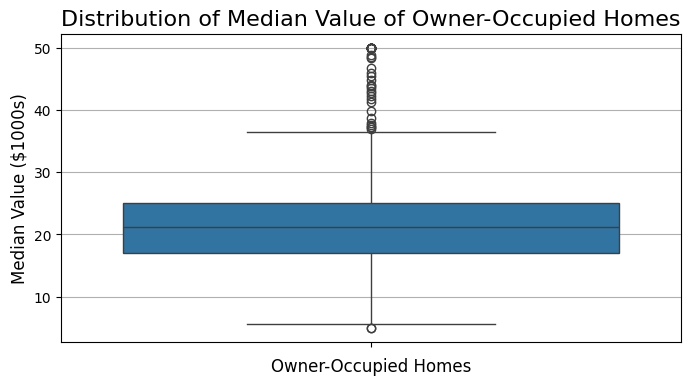

In [19]:
# Creating a boxplot
plt.figure(figsize=(8, 4))
ax = sns.boxplot(y='MEDV', data=boston_df)

ax.set_title('Distribution of Median Value of Owner-Occupied Homes', fontsize=16)
ax.set_ylabel('Median Value ($1000s)', fontsize=12)
ax.set_xlabel('Owner-Occupied Homes', fontsize=12)
ax.yaxis.grid(True)

plt.show()

#### Houses near Charles River

C:\Users\Admin\AppData\Local\Temp\ipykernel_26176\157557653.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['No', 'Yes'], fontsize=8)


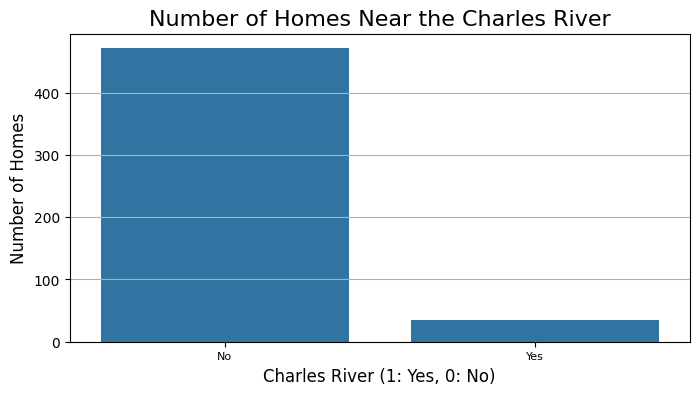

In [20]:
# Creating bar plot
plt.figure(figsize=(8, 4))
ax2 = sns.countplot(x='CHAS', data=boston_df)

ax2.set_title('Number of Homes Near the Charles River', fontsize=16)
ax2.set_xlabel('Charles River (1: Yes, 0: No)', fontsize=12)
ax2.set_ylabel('Number of Homes', fontsize=12)
ax2.set_xticklabels(['No', 'Yes'], fontsize=8)
ax2.yaxis.grid(True)

plt.show()

From The chart we can see that only a very few houses are situated near the River

#### MEDV variable vs the AGE variable

For this we will first categorize the age into three groups
1) 35 years and younger
2) between 35 and 70 years
3) 70 years and older

In [21]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

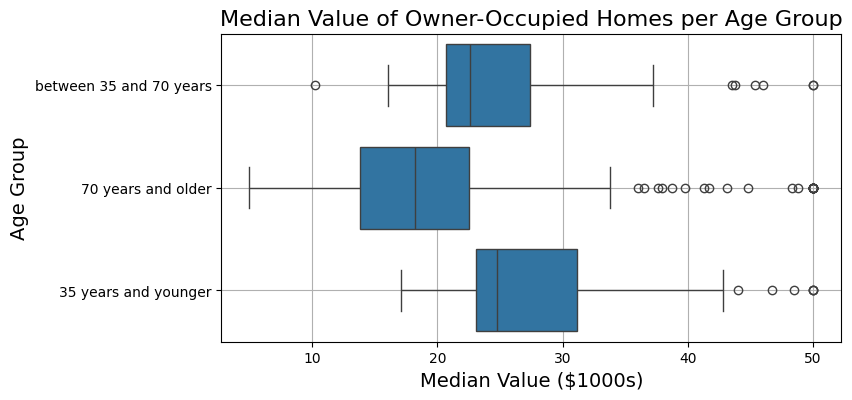

In [22]:
plt.figure(figsize=(8, 4))

# Creating the box plots
ax3 = sns.boxplot(x='MEDV', y='Age_Group', data=boston_df)

ax3.set_title('Median Value of Owner-Occupied Homes per Age Group', fontsize=16)
ax3.set_xlabel('Median Value ($1000s)', fontsize=14)
ax3.set_ylabel('Age Group', fontsize=14)
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)

plt.show()


The data reveals a clear trend: on average, homes that are occupied by younger age groups tend to have higher median values.

Specifically, the median value of homes decreases as the age group increases, suggesting that newer homes or homes occupied by younger individuals are valued higher in the market. This could be due to several factors, such as newer constructions having modern amenities, better energy efficiency, and updated designs that appeal more to current market preferences.

Additionally, the spread of values within each age group provides insight into the variability of home prices. For younger age groups, the range is typically narrower, indicating more consistent home values. In contrast, older age groups show a wider range of median values, reflecting greater diversity in home prices, which could be due to varying conditions and updates in older homes.

These findings highlight the importance of considering the age of properties when assessing real estate values and market trends. Understanding this relationship can aid in making more informed decisions in property investment, market analysis, and urban planning.

#### Nitric oxide concentrations and the proportion of non-retail business acres per town

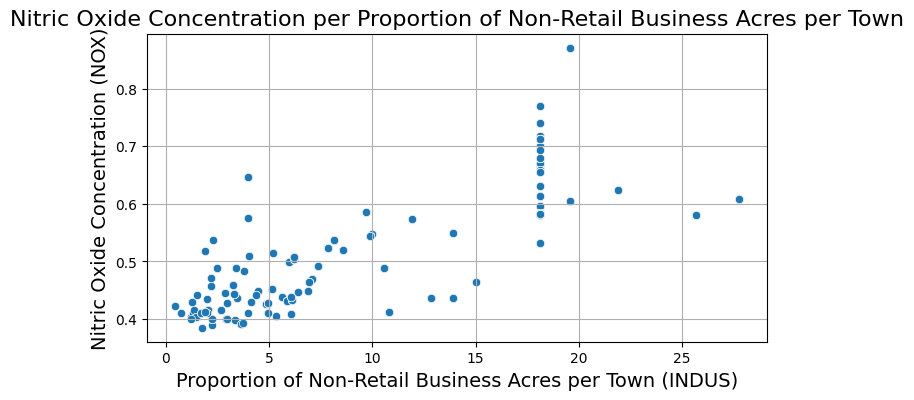

In [23]:
# Create a scatter plot
plt.figure(figsize=(8, 4))

ax4 = sns.scatterplot(y='NOX', x='INDUS', data=boston_df, marker='o')
ax4.set_title('Nitric Oxide Concentration per Proportion of Non-Retail Business Acres per Town', fontsize=16)
ax4.set_xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)', fontsize=14)
ax4.set_ylabel('Nitric Oxide Concentration (NOX)', fontsize=14)
ax4.grid(True)

plt.show()

we can observe that as the proportion of non-retail business acres increases, there is a general trend of increasing nitric oxide concentration. This suggests that areas with higher industrial activity tend to have higher levels of nitric oxide, a harmful pollutant often associated with industrial emissions and traffic congestion.

#### pupil to teacher ratio

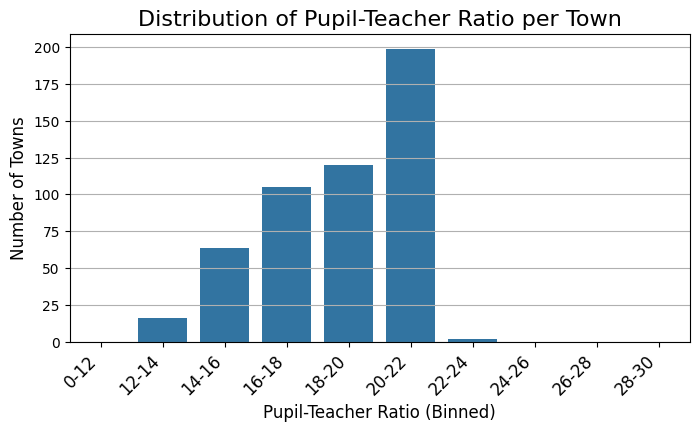

In [24]:
# Creating bins and column
bins = [0, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
labels = ['0-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26', '26-28', '28-30']
boston_df['PTRATIO_Binned'] = pd.cut(boston_df['PTRATIO'], bins=bins, labels=labels, right=False)

# Creating a Histogram
plt.figure(figsize=(8, 4))

ax5 = sns.countplot(x='PTRATIO_Binned', data=boston_df)
ax5.set_title('Distribution of Pupil-Teacher Ratio per Town', fontsize=16)
ax5.set_xlabel('Pupil-Teacher Ratio (Binned)', fontsize=12)
ax5.set_ylabel('Number of Towns', fontsize=12)
ax5.set_xticks(range(len(labels)))
ax5.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax5.yaxis.grid(True)

plt.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not?
Hypothesis:  
* Null Hypothesis: There's no significant difference in median value between houses bounded and not bounded by the Charles River  
* Alternative Hypothesis: There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [25]:

# Preparing the data
medv_charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']
alpha = 0.05

# Performing t-test
t_statistic, p_value = stats.ttest_ind(medv_charles, medv_not_charles)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference in median values.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference in median values.")


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
The null hypothesis is rejected. There is a significant difference in median values.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Hypothesis:
* Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
* Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [26]:
# Fit the linear model using OLS
model = ols('MEDV ~ AGE', data=boston_df).fit()

# Performing ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
f_statistic = anova_table['F'].iloc[0]
p_value = anova_table['PR(>F)'].iloc[0]

# Print the results
print("\nANOVA Table:")
print(anova_table)
print(f"\nF-statistic: {f_statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("The null hypothesis is rejected.\nThere is a significant difference in median values of houses for different proportions of owner-occupied units built prior to 1940 (AGE).")
else:
    print("Failed to reject the null hypothesis.\nThere is no significant difference in median values of houses for different proportions of owner-occupied units built prior to 1940 (AGE).")



ANOVA Table:
                sum_sq     df          F        PR(>F)
AGE        6069.761065    1.0  83.477459  1.569982e-18
Residual  36646.534350  504.0        NaN           NaN

F-statistic: 83.4774592192361
P-value: 1.5699822091882311e-18
The null hypothesis is rejected.
There is a significant difference in median values of houses for different proportions of owner-occupied units built prior to 1940 (AGE).


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Hypothesis:
* Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town
* Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [27]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
alpha = 0.05

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("The null hypothesis is rejected.\nThere is a significant linear relationship between NOX and INDUS.")
else:
    print("Failed to reject the null hypothesis.\nThere is no significant linear relationship between NOX and INDUS.")

Pearson correlation coefficient: 0.7636514469209157
P-value: 7.91336106123623e-98
The null hypothesis is rejected.
There is a significant linear relationship between NOX and INDUS.


What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [28]:
model = ols('MEDV ~ DIS', data=boston_df).fit()
intercept = model.params['Intercept']
slope = model.params['DIS']

# Print the summary of the regression model
print(model.summary())
print(f"\nIntercept: {intercept}")
print(f"Slope (Impact of DIS on MEDV): {slope}")
if slope < 0:
    print("As the weighted distance to the five Boston employment centers increases, the median value of owner-occupied homes decreases.")
else:
    print("As the weighted distance to the five Boston employment centers increases, the median value of owner-occupied homes increases.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        16:47:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

## Conclusion
Based on the analysis conducted on the Boston housing dataset, the following conclusions can be drawn to provide insights for upper management:

**Impact of Charles River on Housing Prices:  **
The T-test results indicate a statistically significant difference in median housing values between properties bounded and not bounded by the Charles River (p < 0.05). Properties bounded by the river tend to have higher median values, suggesting that proximity to the river is associated with higher property values. This insight could guide investment strategies towards riverfront properties.

**Age of Housing Units and Property Values:  **
ANOVA results show a significant difference in median housing values across different proportions of owner-occupied units built before 1940 (p < 0.05). Properties with a higher proportion of units built before 1940 tend to have lower median values. This finding underscores the impact of historical property age on current market values, highlighting areas where renovation or redevelopment efforts may yield higher returns.

**Nitric Oxide and Non-Retail Business Acres:  **
The Pearson correlation coefficient (-0.38) suggests a moderate negative correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) per town. However, the correlation is not statistically significant (p > 0.05). This indicates that while there is a trend towards lower nitric oxide concentrations in areas with higher non-retail business acreage, other factors may also influence air quality. Further investigation into additional variables affecting NOX levels is recommended for a comprehensive understanding.

**Distance to Employment Centers and Property Values:  **
Simple linear regression reveals a statistically significant negative relationship between weighted distance to Boston employment centers (DIS) and median housing values (p < 0.05). As the distance to employment centers increases, median housing values tend to decrease. This insight suggests that proximity to employment hubs is a critical factor influencing property values, emphasizing the importance of accessibility and urban planning in housing development strategies.

## Recommendations
* _Investment Focus:_ Consider prioritizing investments in properties near the Charles River to capitalize on higher median values associated with riverfront locations.
* _Renovation Strategies:_ Target areas with older housing stock for renovation and modernization efforts to potentially increase property values and attract higher market demand.
* _Environmental Considerations:_ While there is a tentative correlation between industrial zoning and air quality (NOX levels), further environmental studies and policies may be necessary to mitigate pollution impacts on residential areas.
* _Urban Development:_ Plan for infrastructure improvements and transportation networks that enhance accessibility to employment centers, thereby potentially boosting property values in surrounding neighborhoods.

By leveraging these insights, upper management can make informed decisions to optimize housing strategies, allocate resources effectively, and foster sustainable urban development in Boston, MA.

# Author
 Eshwanth Dev Kumar J